<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
! pip install imbalanced-learn
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off or in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [2]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2021-10-26 21:39:05--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2021-10-26 21:39:06 (100 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File


In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object


In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [7]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

# All requested packages already installed.



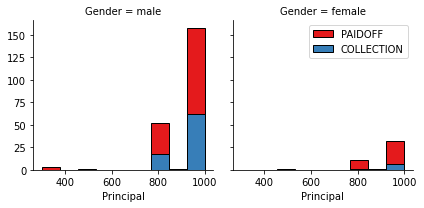

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

<AxesSubplot:>

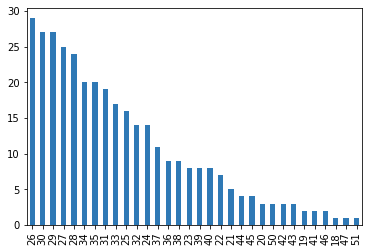

In [9]:
sns.set_palette('RdBu_r')
df.age.value_counts().plot(kind = 'bar')

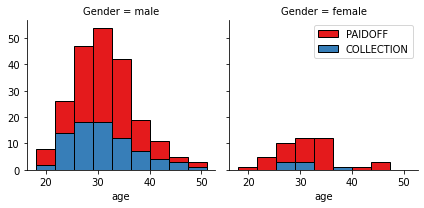

In [10]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

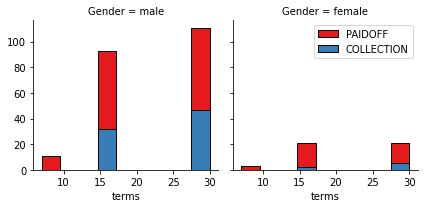

In [11]:
df.head()
bins = np.linspace(df['terms'].min(),df['terms'].max(),10)
g = sns.FacetGrid(df,col = 'Gender',hue = 'loan_status',palette ='Set1')
g.map(plt.hist,'terms',bins = bins,ec = 'k')
plt.legend()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


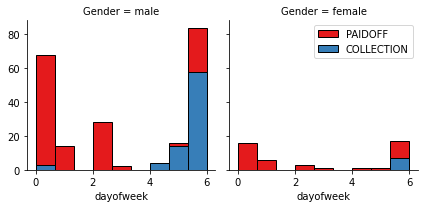

In [12]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [13]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:

In [14]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of females pay their loans while only 73 % of males pay their loan


Let's convert male to 0 and female to 1:


In [15]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [16]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [17]:
df['loan_status'].value_counts(normalize=True)

PAIDOFF       0.751445
COLLECTION    0.248555
Name: loan_status, dtype: float64

our dataset is imbalanced

Lets use oversampling to avoid classifying the majority class more often

#### Features before One Hot Encoding


In [18]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [19]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [20]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [21]:
y = df['loan_status'].values

## Normalize Data

Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [22]:
X.shape
#y.shape

(346, 8)

In [23]:
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [24]:
#import sklearn dependencies
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler,Normalizer
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,f1_score,classification_report
from sklearn import set_config
set_config(display='diagram')

In [25]:
#split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)

## Oversampling

In [26]:
from imblearn.over_sampling import ADASYN,SMOTE

In [27]:
#oversampling the train dataset using ADASYN
ada = SMOTE(random_state = 111)
X_train,y_train = ada.fit_resample(X_train,y_train)

In [28]:
print('number of collection class in y:',(y_train=='COLLECTION').sum())
print('number of PAIDOFF class in y:',(y_train=='PAIDOFF').sum())

number of collection class in y: 182
number of PAIDOFF class in y: 182


In [29]:
#create a column transformer for the preprocessing steps
#ct = make_column_transformer((MinMaxScaler(),['Principal','terms','age']))
ct = make_column_transformer((MinMaxScaler(),X.columns))

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [30]:
#import the K Nearest Neighbors class
from sklearn.neighbors import KNeighborsClassifier

In [31]:
#create an object of the class
knn = KNeighborsClassifier() 
#create a knn pipeline - knn_pipe
knn_pipe = make_pipeline(ct,knn)

In [32]:
#confusion matrix
def cm_matrix(y_test,y_pred):
    cm = sns.heatmap(confusion_matrix(y_test,y_pred),cmap = plt.cm.Oranges,annot = True)
    cm.set_xticklabels(['COLLECTION','PAIDOFF'])
    cm.set_yticklabels(['COLLECTION','PAIDOFF'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    return cm;

#### finding the best k manually

In [33]:
odd_nums = [x for x in np.arange(1,12) if x%2!=0]

In [34]:
knn_score = []
for i in odd_nums:
    #build a model for each iteration
    knn = make_pipeline(ct,KNeighborsClassifier(n_neighbors = i))
    #cross validate the model
    cv_score = cross_val_score(knn,X,y,cv = 10)
    #take the mean
    mean_cv = cv_score.mean()
    #score the model
    knn_score.append(mean_cv)

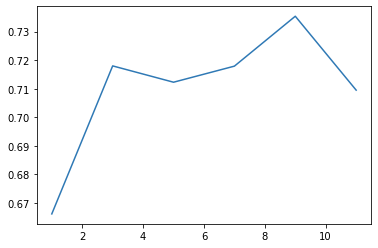

In [35]:
plt.plot(odd_nums,knn_score)

In [37]:
print('best score = {}'.format(np.max(knn_score)))

best score = 0.7353781512605042


In [38]:
#build a new knn model with the best k (9)
knn = KNeighborsClassifier(n_neighbors = 9)
knn_pipe = make_pipeline(ct,knn)
knn_pipe.fit(X_train,y_train)

#pridict with the testing dataset
knn_predicted = knn_pipe.predict(X_test)

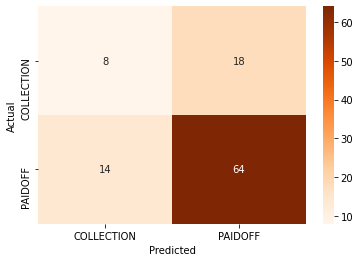

In [39]:
cm_matrix(y_test,knn_predicted);

In [40]:
#build the knn model with tuned parameters
knn_model = knn_pipe.fit(X,y) #fit X and y
knn_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  Index(['Principal', 'terms', 'age', 'Gender', 'weekend', 'Bechalor',
       'High School or Below', 'college'],
      dtype='object'))])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=9))])

# Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
#dt = DecisionTreeClassifier()
dt = DecisionTreeClassifier()

In [43]:
dt_pipe = make_pipeline(ct,dt)
dt_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  Index(['Principal', 'terms', 'age', 'Gender', 'weekend', 'Bechalor',
       'High School or Below', 'college'],
      dtype='object'))])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [44]:
dt_params = [{'decisiontreeclassifier__min_samples_leaf':np.arange(5,20),
          'decisiontreeclassifier__max_depth':np.arange(5,30),
          'decisiontreeclassifier__class_weight':[{'COLLECTION':4,'PAIDOFF':1},{'COLLECTION':3,'PAIDOFF':1},{'COLLECTION':5,'PAIDOFF':2}]},
         {'decisiontreeclassifier':[DecisionTreeClassifier()]}]

In [45]:
gscv = GridSearchCV(dt_pipe,param_grid=dt_params,cv = 5,n_jobs = -1,error_score = 'raise')

In [46]:
gscv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('minmaxscaler',
                                                                         MinMaxScaler(),
                                                                         Index(['Principal', 'terms', 'age', 'Gender', 'weekend', 'Bechalor',
       'High School or Below', 'college'],
      dtype='object'))])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid=[{'decisiontr...'COLLECTION': 4,
                                                                    'PAIDOFF': 1},
                                                                   {'COLLECTION': 3,
                                                                    'PAIDOFF': 1},
                                                                   {'COLLECTION': 5,
                                                                    'PAIDOFF': 2}],
                          'decisiontreeclassifier__max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29]),
                          'decisiontreeclassifier__min_samples_leaf': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])},
                         {'decisiontreeclassifier': [DecisionTreeClassifier()]}])

In [47]:
gscv.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  Index(['Principal', 'terms', 'age', 'Gender', 'weekend', 'Bechalor',
       'High School or Below', 'college'],
      dtype='object'))])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [48]:
('best score : {}'.format(gscv.best_score_))

'best score : 0.8132039573820394'

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

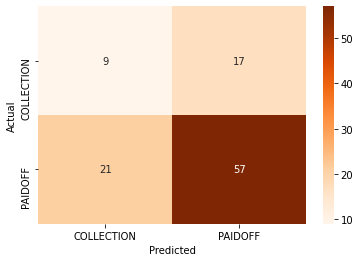

In [49]:
gscv_dt_predited = gscv.predict(X_test)
cm_matrix(y_test,gscv_dt_predited)

In [50]:
('f1 score : {}'.format(f1_score(y_test,gscv_dt_predited,pos_label='COLLECTION')))
print(classification_report(y_test,gscv_dt_predited))

              precision    recall  f1-score   support

  COLLECTION       0.30      0.35      0.32        26
     PAIDOFF       0.77      0.73      0.75        78

    accuracy                           0.63       104
   macro avg       0.54      0.54      0.54       104
weighted avg       0.65      0.63      0.64       104



### final decision tree model

In [51]:
dt_model = make_pipeline(ct,DecisionTreeClassifier())
dt_model.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  Index(['Principal', 'terms', 'age', 'Gender', 'weekend', 'Bechalor',
       'High School or Below', 'college'],
      dtype='object'))])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

# Support Vector Machine


In [52]:
from sklearn.svm import SVC

#### search for the best kernel

In [80]:
kernels = ['linear','rbf','sigmoid']
svc_score = []
for i in kernels:
    svc = make_pipeline(ct,SVC(kernel = i))
    #cross validate the model
    svc_cv = cross_val_score(svc,X,y,cv = 10)
    #take the mean of the cv
    svc_mean = svc_cv.mean()
    #append to svc_score list
    svc_score.append(svc_mean)

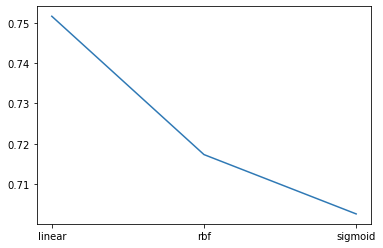

In [81]:
plt.plot(kernels,svc_score);

In [82]:
np.max(svc_score)

0.7515966386554622

In [59]:
svc_pipe = make_pipeline(ct,SVC(kernel = 'linear'))

In [83]:
# Try Tuning More Hyperparameters for optimal model performance
svc_params = [{'svc__kernel':['linear'],
              'svc__gamma':['scale','auto'],
              'svc__C':np.arange(1,10),
              'columntransformer__minmaxscaler':[StandardScaler()]},
              {'svc__kernel':['linear','sigmoid','rbf'],
              'svc__gamma':['scale','auto'],
              'svc__C':np.arange(1,100)}]

svc_gscv = GridSearchCV(svc_pipe,param_grid=svc_params,cv = 10,n_jobs = -1)
svc_gscv.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('minmaxscaler',
                                                                         MinMaxScaler(),
                                                                         Index(['Principal', 'terms', 'age', 'Gender', 'weekend', 'Bechalor',
       'High School or Below', 'college'],
      dtype='object'))])),
                                       ('svc', SVC(kernel='linear'))]),
             n_jobs=-1,
             param_grid=[{'columntransformer__minmaxscaler': [StandardScaler()],...
                         {'svc__C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                          'svc__gamma': ['scale', 'auto'],
                          'svc__kernel': ['linear', 'sigmoid', 'rbf']}])

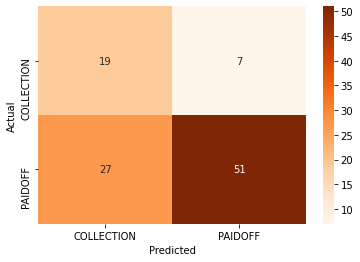

In [84]:
svc_gscv_predicted = svc_gscv.predict(X_test)
cm_matrix(y_test,svc_gscv_predicted);

In [85]:
svc_gscv.best_score_

0.7891891891891892

In [86]:
print(classification_report(y_test,svc_gscv_predicted))

              precision    recall  f1-score   support

  COLLECTION       0.41      0.73      0.53        26
     PAIDOFF       0.88      0.65      0.75        78

    accuracy                           0.67       104
   macro avg       0.65      0.69      0.64       104
weighted avg       0.76      0.67      0.69       104



### final Support Vector Machines Model

In [87]:
svc_model = SVC(kernel = 'linear')
svc_model = svc_pipe.fit(X,y)
svc_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  Index(['Principal', 'terms', 'age', 'Gender', 'weekend', 'Bechalor',
       'High School or Below', 'college'],
      dtype='object'))])),
                ('svc', SVC(kernel='linear'))])

# Logistic Regression


In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
logreg_pipe = make_pipeline(ct,LogisticRegression())

In [97]:
logreg_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  Index(['Principal', 'terms', 'age', 'Gender', 'weekend', 'Bechalor',
       'High School or Below', 'college'],
      dtype='object'))])),
                ('logisticregression', LogisticRegression())])

In [98]:
#Tune the Logistic Regression's Parameters with Grid Search
logreg_params = [{"logisticregression__penalty": ['l2'],
                 "logisticregression__C": np.logspace(0, 4, 10)},
                 {"logisticregression__penalty" : ['l2'],
                 "logisticregression__C": np.logspace(0, 4, 10),
                 "logisticregression__solver":['newton-cg','saga','sag','liblinear'] ##This solvers don't allow L1 penalty
                 }]

In [102]:
logreg_gscv= GridSearchCV(logreg_pipe,param_grid=logreg_params,cv = 5,n_jobs = -1,error_score='raise')
logreg_gscv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('minmaxscaler',
                                                                         MinMaxScaler(),
                                                                         Index(['Principal', 'terms', 'age', 'Gender', 'weekend', 'Bechalor',
       'High School or Below', 'college'],
      dtype='object'))])),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'logisticregression...
       3.59381366e+03, 1.00000000e+04]),
                          'logisticregression__penalty': ['l2']},
                         {'logisticregression__C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                          'logisticregression__penalty': ['l2'],
                          'logisticregression__solver': ['newton-cg', 'saga',
                                                         'sag', 'liblinear']}])

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

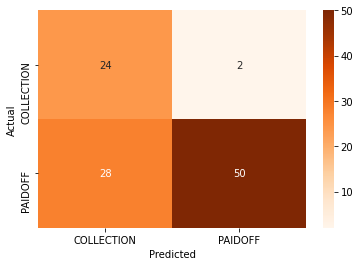

In [103]:
logreg_gscv_predicted = logreg_gscv.predict(X_test)
cm_matrix(y_test,logreg_gscv_predicted)

In [104]:
print(classification_report(y_test,logreg_gscv_predicted))

              precision    recall  f1-score   support

  COLLECTION       0.46      0.92      0.62        26
     PAIDOFF       0.96      0.64      0.77        78

    accuracy                           0.71       104
   macro avg       0.71      0.78      0.69       104
weighted avg       0.84      0.71      0.73       104



### final Logistic Regression Model

In [105]:
logreg_model = make_pipeline(ct,LogisticRegression())
logreg_model.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  Index(['Principal', 'terms', 'age', 'Gender', 'weekend', 'Bechalor',
       'High School or Below', 'college'],
      dtype='object'))])),
                ('logisticregression', LogisticRegression())])

# Model Evaluation using Test set


In [106]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:


In [107]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2021-10-26 21:50:48--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2021-10-26 21:50:48 (41.5 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation


In [108]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


### Preprocessing the Testing Dataset

In [109]:
def preprocess_test():
    test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
    test_df['due_date'] = pd.to_datetime(test_df['effective_date'])
    
    test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
    test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
   
    test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
    Feature = test_df[['Principal','terms','age','Gender','weekend']]
    Feature = pd.concat([Feature,pd.get_dummies(test_df['education'])], axis=1)
    Feature.drop(['Master or Above'], axis = 1,inplace=True)
    
    
    X_test = Feature
    X_test[0:5]
    y_test = test_df['loan_status'].values
    return X_test,y_test

In [110]:
X_test_,y_test_  = preprocess_test()
X_test_.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [111]:
class models:
    def __init__(self,X_test,y_test,pos_label):
        self.X_test = X_test
        self.y_test = y_test
        self.pos_label = pos_label
        
    def evaluate(self,model):
        y_pred = model.predict(self.X_test)
        jaccard = jaccard_score(self.y_test,y_pred,pos_label = self.pos_label)
        f1 = f1_score(self.y_test,y_pred,pos_label = self.pos_label)
        if model==logreg_model:
            proba = model.predict_proba(self.X_test)
            log = log_loss(self.y_test,proba)
            return jaccard,f1,log
        return jaccard,f1

    def score_model(self,model):
        if model==logreg_model:
            (jaccard,f1,log) = self.evaluate(model)
            return ({'Jaccard':jaccard,'F1-score':f1,'LogLoss':log})
        else:
            (jaccard,f1) = self.evaluate(model)
            return ({'Jaccard':jaccard,'F1-score':f1})

In [112]:
algos =models(X_test_,y_test_,pos_label = 'PAIDOFF')

In [113]:
scores = pd.DataFrame(algos.score_model(knn_model),index = ['KNN'])
scores = pd.concat((scores,pd.DataFrame(algos.score_model(dt_model),index=['Decision Tree'])),axis = 0)
scores = pd.concat((scores,pd.DataFrame(algos.score_model(svc_model),index=['SVM'])),axis = 0)
scores = pd.concat((scores,pd.DataFrame(algos.score_model(logreg_model),index=['LogisticRegression'])),axis = 0)
scores.columns.name = 'Algorithm'

# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |


In [114]:
scores

Algorithm,Jaccard,F1-score,LogLoss
KNN,0.660377,0.795455,NaN
Decision Tree,0.645833,0.784810,NaN
SVM,0.740741,0.851064,NaN
LogisticRegression,0.613636,0.760563,0.577712


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
